In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

import pandas as pd
import numpy as np
import scipy as sp
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import arviz as az
import seaborn as sns

plt.style.use('kinesis.mplstyle')

In [ ]:
plt.style.use

In [7]:
d = pd.read_csv(
    "../scripts/arv_repeat.txt",
    names=['opt_vx', 'opt_vy', 'opt_vz', 'opt_sigv', 'vx_mean', 'vy_mean', 'vz_mean', 'sigv_mean', 'vx_std', 'vy_std', 'vz_std', 'sigv_std'])

In [8]:
d.head()

,opt_vx,opt_vy,opt_vz,opt_sigv,vx_mean,vy_mean,vz_mean,sigv_mean,vx_std,vy_std,vz_std,sigv_std
0,-6.274545,45.370315,5.337908,0.281764,-6.272927,45.377614,5.339670,0.293006,0.040842,0.094475,0.033144,0.007158
1,-6.385897,45.046548,5.242359,0.276561,-6.386143,45.048313,5.242492,0.287381,0.039689,0.093341,0.032878,0.006706
2,-6.318363,45.173813,5.311938,0.284778,-6.319003,45.174866,5.311576,0.295945,0.040825,0.095640,0.033863,0.006994
3,-6.329417,45.136016,5.264526,0.290072,-6.329240,45.138504,5.264569,0.301217,0.040558,0.094604,0.033292,0.006915
4,-6.418327,45.065555,5.273092,0.292455,-6.419554,45.065369,5.272876,0.303553,0.041723,0.097483,0.034334,0.007278


In [14]:
vx_true, vy_true, vz_true, sigv_true = -6.32, 45.24, 5.30, 0.3

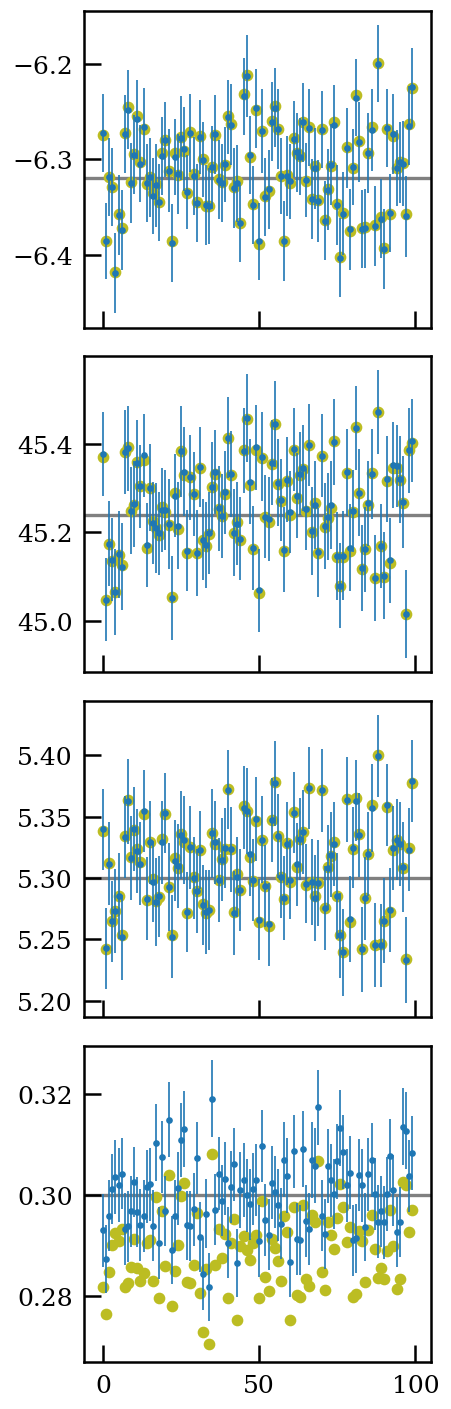

In [29]:
fig, ax = plt.subplots(4, 1, figsize=(4, 12), sharex='col')
for cax, v, v_true in zip(ax.ravel(), ['vx','vy','vz','sigv'], [vx_true, vy_true, vz_true, sigv_true]):
    cax.errorbar(np.arange(100), d[f'{v}_mean'], yerr=d[f'{v}_std'], marker='.', ls='', elinewidth=1)
    cax.scatter(np.arange(100), d[f'opt_{v}'], color='C8')
    cax.axhline(v_true, c='gray', zorder=-1);
fig.tight_layout();

In [37]:
d.describe()

,opt_vx,opt_vy,opt_vz,opt_sigv,vx_mean,vy_mean,vz_mean,sigv_mean,vx_std,vy_std,vz_std,sigv_std
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-6.310445,45.258983,5.310218,0.288907,-6.310981,45.260809,5.310198,0.299962,0.041253,0.096316,0.034012,0.007149
std,0.045078,0.104167,0.036777,0.007599,0.044985,0.103965,0.036731,0.007509,0.001207,0.002759,0.000959,0.000212
min,-6.418327,45.014996,5.234005,0.270473,-6.419554,45.015006,5.233212,0.281798,0.038750,0.090593,0.031782,0.006692
25%,-6.343357,45.172950,5.283641,0.283034,-6.344011,45.174303,5.283309,0.294073,0.040466,0.094326,0.033374,0.007008
50%,-6.309159,45.259034,5.314317,0.289451,-6.309567,45.262313,5.312880,0.300434,0.041274,0.096436,0.034016,0.007153
75%,-6.274532,45.337747,5.333804,0.293464,-6.273998,45.339856,5.333405,0.304328,0.041994,0.097947,0.034562,0.007259
max,-6.198861,45.472476,5.399863,0.308155,-6.200049,45.472635,5.399489,0.319113,0.044329,0.103977,0.036414,0.007653


In [30]:
from corner import corner

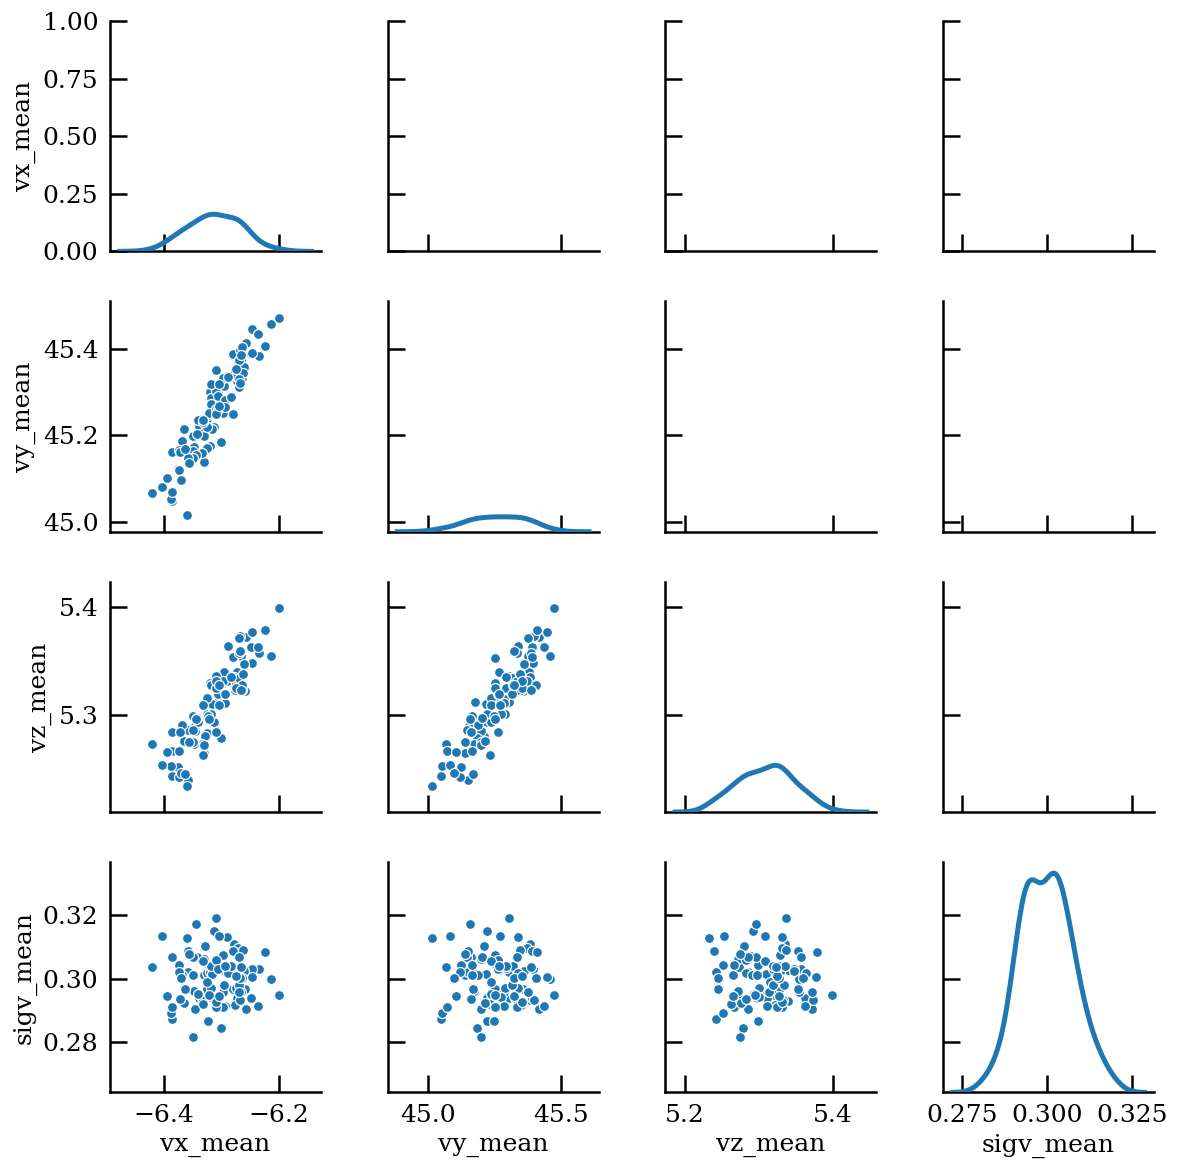

In [36]:
g = sns.PairGrid(d[['vx_mean', 'vy_mean', 'vz_mean', 'sigv_mean']])
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

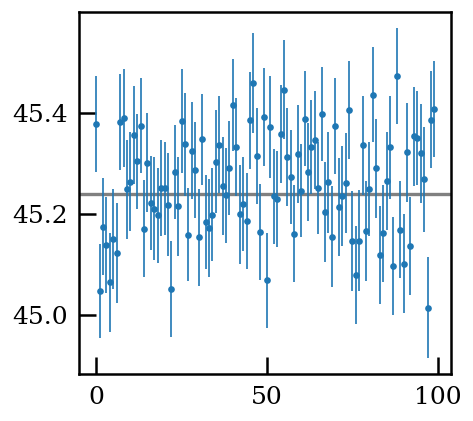

In [17]:
plt.errorbar(np.arange(100), d['vy_mean'], yerr=d['vy_std'], marker='.', ls='', elinewidth=1)
plt.axhline(vy_true, c='gray', zorder=-1);

In [1]:
import pickle

with open("../scripts/arv_repeat.pkl", "rb") as f:
    result = pickle.load(f)

EOFError: Ran out of input